In [1]:
# Model Fully Connected Neural Network untuk persoalan regresi menggunakan dataset Boston Housing Price
# Urutan proses:
# Step 1 - Memanggil library yang diperlukan
# Step 2 - Memanggil dataset
# Step 3 - Melihat isi sample dataset
# Step 4 - Preprocessing dataset
# Step 5 - Membangun model regresi
# Step 6 - Kompile dan training model
# Step 7 - Menampilkan plot training history
# Step 8 - Evaluasi pada dataset

In [2]:
# Step 1 - Memanggil library yang diperlukan
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
from keras import models, layers
from matplotlib import pyplot

In [3]:
# Step 2 - Memanggil dataset
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [4]:
# Step 3 - Melihat isi sample dataset
print(X_train[0], y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2


In [5]:
# Step 4 - Preprocessing dataset
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit scaler pada training set
scaler.fit(X_train)
# transformasi ke training dan testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# menampilkan sampel output
print(X_train_scaled[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [6]:
# Step 5 - Pembuatan model regresi
#from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(8, activation='relu'))
# output layer
model.add(layers.Dense(1))

In [7]:
# Step 6 - Kompile dan training model
model.compile(optimizer='adam', loss='log_cosh', metrics='mae')
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
11/11 [==============================] - 2s 27ms/step - loss: 20.5078 - mae: 21.2007 - val_loss: 19.8875 - val_mae: 20.5790
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 14.4097 - mae: 15.0951 - val_loss: 8.0707 - val_mae: 8.7291
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 7.6317 - mae: 8.2905 - val_loss: 5.6871 - val_mae: 6.3328
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 4.8245 - mae: 5.4729 - val_loss: 3.9918 - val_mae: 4.6054
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 3.2442 - mae: 3.8637 - val_loss: 2.7381 - val_mae: 3.3543
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 2.8430 - mae: 3.4451 - val_loss: 2.6538 - val_mae: 3.2587
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 2.4485 - mae: 3.0445 - val_loss: 2.4765 - val_mae: 3.0667
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 2.1

11/11 [==============================] - 0s 7ms/step - loss: 0.7702 - mae: 1.2259 - val_loss: 1.9735 - val_mae: 2.5404
Epoch 64/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7739 - mae: 1.2254 - val_loss: 2.0751 - val_mae: 2.6352
Epoch 65/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7690 - mae: 1.2124 - val_loss: 1.9664 - val_mae: 2.5450
Epoch 66/100
11/11 [==============================] - 0s 7ms/step - loss: 0.8088 - mae: 1.2671 - val_loss: 1.9849 - val_mae: 2.5548
Epoch 67/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7493 - mae: 1.1803 - val_loss: 1.9921 - val_mae: 2.5508
Epoch 68/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7925 - mae: 1.2620 - val_loss: 2.0489 - val_mae: 2.6268
Epoch 69/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7681 - mae: 1.2297 - val_loss: 1.9974 - val_mae: 2.5853
Epoch 70/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7711 - mae: 1

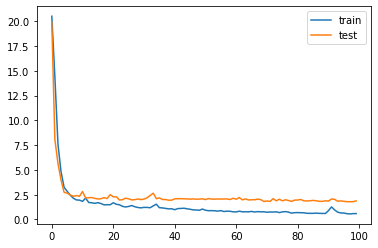

In [8]:
# Step 7 - Menampilkan plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [9]:
# Step 8 - Evaluasi pada dataset
model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 2.4010 - mae: 2.9940


[2.400956869125366, 2.993961811065674]

In [10]:
# Step 9 - Melakukan prediksi
to_predict = X_train_scaled[:10]  # sampel data (10 input pertama dari training data)
predictions = model.predict(to_predict)  # memanggil predict method
print(predictions)  # mencetak nilai prediksi
print(y_train[:10])  # mencetak nilai sesungguhnya

[[14.515253]
 [41.980545]
 [51.286064]
 [19.593063]
 [19.39201 ]
 [17.610168]
 [10.558794]
 [15.507932]
 [15.499056]
 [14.174471]]
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
